<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data
import scipy.cluster.hierarchy as sch

# Change default pandas display options
pd.options.display.float_format = '{:,.4f}'.format

# monospace font
plt.rcParams['font.family'] = 'monospace'

C:\Users\Sif\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['AAPL', 'AMZN', 'ALSK', 'ABBV', 'ABC', 'ACB', 'NFLX']
#For a brazilian stock as FLRY3 you have to put a .SA so it will be FLRY3.SA
df = data.DataReader(assets, 'yahoo', start = '2018/12/01', end = '2019/12/31')
df.head()

Attributes Adj Close                                                     \
Symbols         AAPL       AMZN   ALSK    ABBV     ABC     ACB     NFLX   
Date                                                                      
2018-12-03   44.9875 1,772.3600 1.4594 82.0316 85.1351 68.2800 290.3000   
2018-12-04   43.0086 1,668.4000 1.4498 79.3077 83.7866 64.8000 275.3300   
2018-12-06   42.5291 1,699.1899 1.4308 79.1150 82.2278 63.3600 282.8800   
2018-12-07   41.0126 1,629.1300 1.4403 76.1634 80.6402 69.0000 265.1400   
2018-12-10   41.2828 1,641.0300 1.4117 76.7327 79.9038 68.7600 269.7000   

Attributes   Close                    ...    Open                   \
Symbols       AAPL       AMZN   ALSK  ...     ABC     ACB     NFLX   
Date                                  ...                            
2018-12-03 46.2050 1,772.3600 1.5300  ... 88.9800 71.4000 293.1900   
2018-12-04 44.1725 1,668.4000 1.5200  ... 88.6000 67.5600 288.1300   
2018-12-06 43.6800 1,699.1899 1.5000  ... 86.9900 57.4800 268.3300   
2018-12-07 42.1225 1,629.1300 1.5100  ... 85.5400 70.0800 282.4800   
2018-12-10 42.4000 1,641.0300 1.4800  ... 84.4200 70.8000 264.1900   

Attributes           Volume                                            \
Symbols                AAPL           AMZN        ALSK           ABBV   
Date                                                                    
2018-12-03 163,210,000.0000 6,862,300.0000 62,000.0000 6,673,900.0000   
2018-12-04 165,377,200.0000 8,694,500.0000 45,900.0000 7,008,400.0000   
2018-12-06 172,393,600.0000 8,789,400.0000 47,800.0000 8,734,300.0000   
2018-12-07 169,126,400.0000 7,576,100.0000 74,000.0000 6,737,700.0000   
2018-12-10 248,104,000.0000 7,494,800.0000 89,200.0000 5,229,400.0000   

Attributes                                                
Symbols               ABC            ACB            NFLX  
Date                                                      
2018-12-03 1,270,200.0000 1,704,758.0000 14,117,400.0000  
2018-12-04 2,102,800.0000 1,088,858.0000 12,800,600.0000  
2018-12-06 1,582,600.0000 1,664,200.0000 13,074,300.0000  
2018-12-07   934,700.0000 1,855,625.0000 12,466,700.0000  
2018-12-10 1,193,900.0000   989,608.0000  9,605,600.0000  

[5 rows x 42 columns]

<div class="alert alert-block alert-info">
<b>Adjust close price by month</b>
</div>

In [3]:
# 10D = 10 Days, M = 1 Month, Q = 1 Quarter....
# Don't use -> .asfreq('M', method = 'ffill') or .ffill()
adj = df['Adj Close']
monthly_price = adj.resample('M').last()
monthly_price.head()

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2018-12-31,38.3959,"1,501.9700",1.3735,80.7441,71.1531,59.5200,267.6600
2019-01-31,40.5136,"1,718.7300",1.7646,71.1840,79.7317,85.0800,339.5000
2019-02-28,42.3277,"1,639.8300",1.6883,70.2531,80.0350,90.7200,358.1000
2019-03-31,46.4345,"1,780.7500",1.8314,71.4500,76.4032,108.7200,356.5600
2019-04-30,49.0551,"1,926.5200",1.6597,71.3194,71.8297,108.9600,370.5400


<div class="alert alert-block alert-info">
<b>Normal returns</b>
</div>

In [4]:
monthly_price

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2018-12-31,38.3959,"1,501.9700",1.3735,80.7441,71.1531,59.5200,267.6600
2019-01-31,40.5136,"1,718.7300",1.7646,71.1840,79.7317,85.0800,339.5000
2019-02-28,42.3277,"1,639.8300",1.6883,70.2531,80.0350,90.7200,358.1000
2019-03-31,46.4345,"1,780.7500",1.8314,71.4500,76.4032,108.7200,356.5600
2019-04-30,49.0551,"1,926.5200",1.6597,71.3194,71.8297,108.9600,370.5400
2019-05-31,42.9618,"1,775.0699",1.5738,68.9118,75.1959,91.0800,343.2800
2019-06-30,48.5692,"1,893.6300",1.6311,65.3274,82.3427,93.8400,367.3200
2019-07-31,52.2796,"1,866.7800",1.7646,60.7601,84.1680,75.0000,322.9900
2019-08-31,51.4190,"1,776.2900",1.6311,59.9575,79.8264,66.0000,293.7500


In [5]:
# Percentage change of values by month, also works:
# returns = ((monthly_price/monthly_price.shift())-1).dropna()
returns = monthly_price.pct_change()
# to remove Nan value use: .dropna()
returns

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2018-12-31,nan,nan,nan,nan,nan,nan,nan
2019-01-31,0.0552,0.1443,0.2847,-0.1184,0.1206,0.4294,0.2684
2019-02-28,0.0448,-0.0459,-0.0432,-0.0131,0.0038,0.0663,0.0548
2019-03-31,0.0970,0.0859,0.0847,0.0170,-0.0454,0.1984,-0.0043
2019-04-30,0.0564,0.0819,-0.0937,-0.0018,-0.0599,0.0022,0.0392
2019-05-31,-0.1242,-0.0786,-0.0517,-0.0338,0.0469,-0.1641,-0.0736
2019-06-30,0.1305,0.0668,0.0364,-0.0520,0.0950,0.0303,0.0700
2019-07-31,0.0764,-0.0142,0.0819,-0.0699,0.0222,-0.2008,-0.1207
2019-08-31,-0.0165,-0.0485,-0.0757,-0.0132,-0.0516,-0.1200,-0.0905


In [6]:
# Simple Cumulative Return
simple_cumulative = np.cumsum(returns)
simple_cumulative.head()

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2018-12-31,nan,nan,nan,nan,nan,nan,nan
2019-01-31,0.0552,0.1443,0.2847,-0.1184,0.1206,0.4294,0.2684
2019-02-28,0.0999,0.0984,0.2415,-0.1315,0.1244,0.4957,0.3232
2019-03-31,0.1970,0.1843,0.3262,-0.1144,0.0790,0.6941,0.3189
2019-04-30,0.2534,0.2662,0.2325,-0.1163,0.0191,0.6963,0.3581


In [7]:
# Cumulative Return (Compound)
compound_cumulative = (1+returns).cumprod()
# To start the first period with 1
compound_cumulative.iloc[0] = 1 
compound_cumulative.head()

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2018-12-31,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2019-01-31,1.0552,1.1443,1.2847,0.8816,1.1206,1.4294,1.2684
2019-02-28,1.1024,1.0918,1.2292,0.8701,1.1248,1.5242,1.3379
2019-03-31,1.2094,1.1856,1.3333,0.8849,1.0738,1.8266,1.3321
2019-04-30,1.2776,1.2827,1.2083,0.8833,1.0095,1.8306,1.3844


<div class="alert alert-block alert-info">
<b>Log returns</b>
</div>

In [8]:
# Percentage change of values by month, also works:
# log_returns = np.log(monthly_price/monthly_price.shift()).dropna()
log_returns = np.log(1+monthly_price.pct_change()).dropna()
log_returns

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2019-01-31,0.0537,0.1348,0.2505,-0.1260,0.1138,0.3573,0.2378
2019-02-28,0.0438,-0.0470,-0.0442,-0.0132,0.0038,0.0642,0.0533
2019-03-31,0.0926,0.0824,0.0813,0.0169,-0.0464,0.1810,-0.0043
2019-04-30,0.0549,0.0787,-0.0984,-0.0018,-0.0617,0.0022,0.0385
2019-05-31,-0.1326,-0.0819,-0.0531,-0.0343,0.0458,-0.1792,-0.0764
2019-06-30,0.1227,0.0647,0.0357,-0.0534,0.0908,0.0299,0.0677
2019-07-31,0.0736,-0.0143,0.0787,-0.0725,0.0219,-0.2241,-0.1286
2019-08-31,-0.0166,-0.0497,-0.0787,-0.0133,-0.0530,-0.1278,-0.0949
2019-09-30,0.0704,-0.0230,0.0058,0.1413,0.0007,-0.2254,-0.0932


In [9]:
# Cumulative Return (Can only be compound)
log_cumulative = np.cumsum(log_returns)
log_cumulative.head()

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2019-01-31,0.0537,0.1348,0.2505,-0.1260,0.1138,0.3573,0.2378
2019-02-28,0.0975,0.0878,0.2063,-0.1392,0.1176,0.4215,0.2911
2019-03-31,0.1901,0.1703,0.2877,-0.1223,0.0712,0.6025,0.2868
2019-04-30,0.2450,0.2489,0.1892,-0.1241,0.0095,0.6047,0.3252
2019-05-31,0.1124,0.1671,0.1361,-0.1585,0.0553,0.4254,0.2488


In [10]:
# The same thing as Cumulative Return (Compound)
compound_ret = np.exp(log_cumulative)
compound_ret

Symbols,AAPL,AMZN,ALSK,ABBV,ABC,ACB,NFLX
Date,,,,,,,
2019-01-31,1.0552,1.1443,1.2847,0.8816,1.1206,1.4294,1.2684
2019-02-28,1.1024,1.0918,1.2292,0.8701,1.1248,1.5242,1.3379
2019-03-31,1.2094,1.1856,1.3333,0.8849,1.0738,1.8266,1.3321
2019-04-30,1.2776,1.2827,1.2083,0.8833,1.0095,1.8306,1.3844
2019-05-31,1.1189,1.1818,1.1458,0.8535,1.0568,1.5302,1.2825
2019-06-30,1.2650,1.2608,1.1875,0.8091,1.1573,1.5766,1.3723
2019-07-31,1.3616,1.2429,1.2847,0.7525,1.1829,1.2601,1.2067
2019-08-31,1.3392,1.1826,1.1875,0.7426,1.1219,1.1089,1.0975
2019-09-30,1.4369,1.1558,1.1944,0.8553,1.1227,0.8851,0.9999


<div class="alert alert-block alert-info">
<b>Correlation matrix with heatmap</b>
</div>

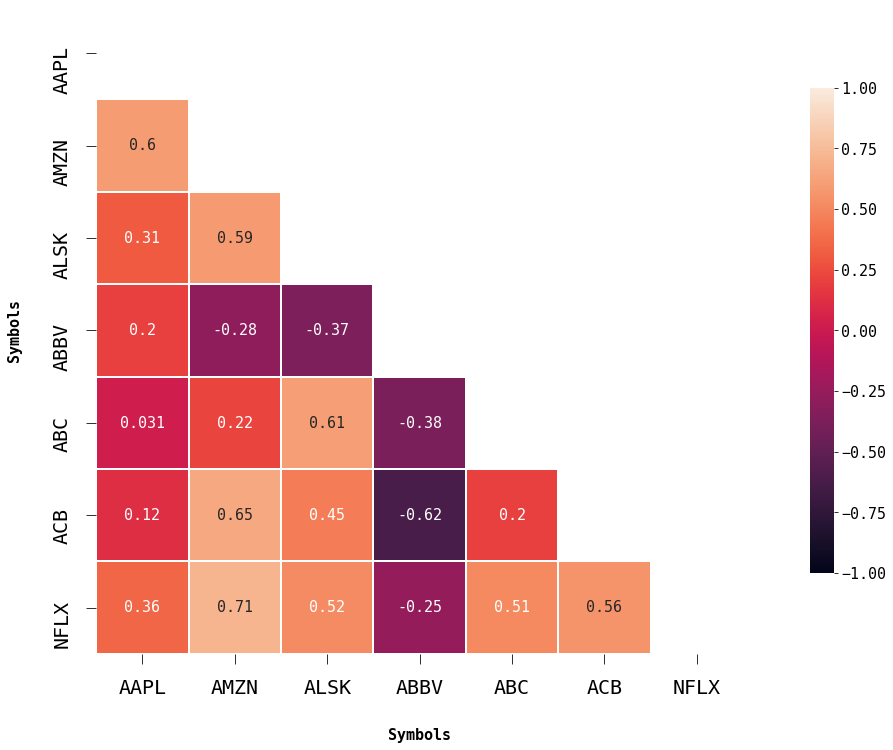

In [11]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

corr = log_returns.corr()

# To hide part of the correlation matrix
hide = np.triu(np.ones_like(corr, dtype = np.bool))

ax = sns.heatmap(corr, mask = hide, annot = True, cmap = 'rocket', 
                 vmax = 1, center = 0, vmin = -1,
                 square = True, linewidths = 1, linecolor = 'white', 
                 cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

ax.set_xlabel('Symbols', weight = 'bold', fontsize = 15, labelpad = 30)
ax.set_ylabel('Symbols', weight = 'bold', fontsize = 15, labelpad = 30)

plt.show()

<div class="alert alert-block alert-info">
<b>Building clusters</b>
</div>

In [12]:
X = corr.values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method = 'complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [log_returns.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_ret = log_returns.reindex(columns, axis=1)

# Cluster correlation
cluster_corr = df_ret.corr()

# Cluster DataFrame
df_ret

Symbols,AMZN,ALSK,ABC,ACB,NFLX,AAPL,ABBV
Date,,,,,,,
2019-01-31,0.1348,0.2505,0.1138,0.3573,0.2378,0.0537,-0.1260
2019-02-28,-0.0470,-0.0442,0.0038,0.0642,0.0533,0.0438,-0.0132
2019-03-31,0.0824,0.0813,-0.0464,0.1810,-0.0043,0.0926,0.0169
2019-04-30,0.0787,-0.0984,-0.0617,0.0022,0.0385,0.0549,-0.0018
2019-05-31,-0.0819,-0.0531,0.0458,-0.1792,-0.0764,-0.1326,-0.0343
2019-06-30,0.0647,0.0357,0.0908,0.0299,0.0677,0.1227,-0.0534
2019-07-31,-0.0143,0.0787,0.0219,-0.2241,-0.1286,0.0736,-0.0725
2019-08-31,-0.0497,-0.0787,-0.0530,-0.1278,-0.0949,-0.0166,-0.0133
2019-09-30,-0.0230,0.0058,0.0007,-0.2254,-0.0932,0.0704,0.1413


<div class="alert alert-block alert-info">
<b>Cluster correlation heatmap</b>
</div>

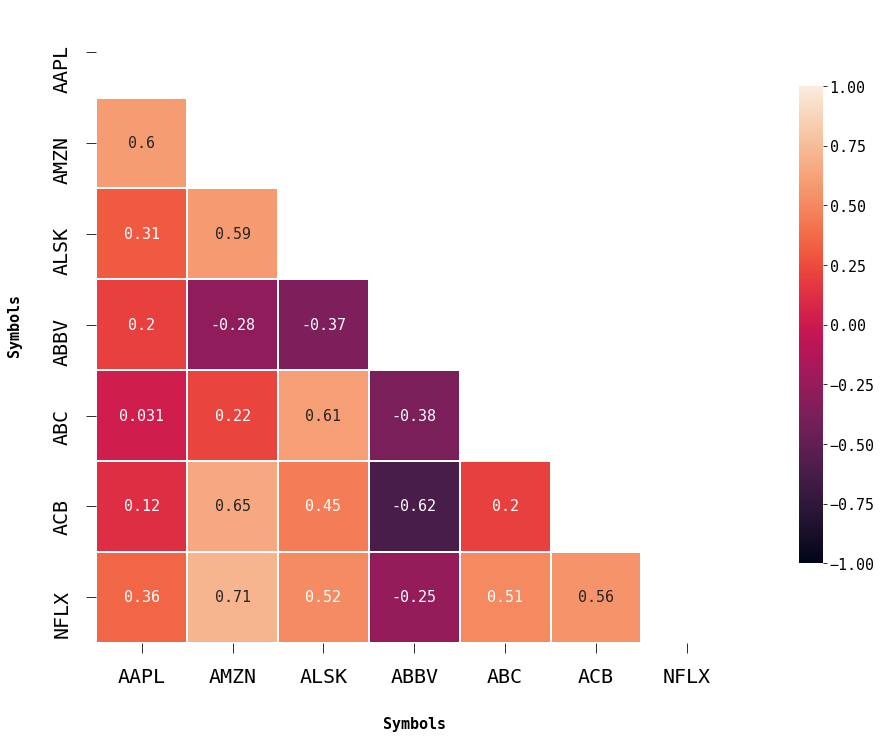

In [13]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

# To hide part of the correlation matrix
hide = np.triu(np.ones_like(cluster_corr, dtype = np.bool))

ax = sns.heatmap(corr, mask = hide, annot = True, cmap = 'rocket', 
                 vmax = 1, center = 0, vmin = -1,
                 square = True, linewidths = 1, linecolor = 'white', 
                 cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

ax.set_xlabel('Symbols', weight = 'bold', fontsize = 15, labelpad = 30)
ax.set_ylabel('Symbols', weight = 'bold', fontsize = 15, labelpad = 30)

plt.show()

<div class="alert alert-block alert-info">
<b>Building cluster heatmap using correlation</b>
</div>

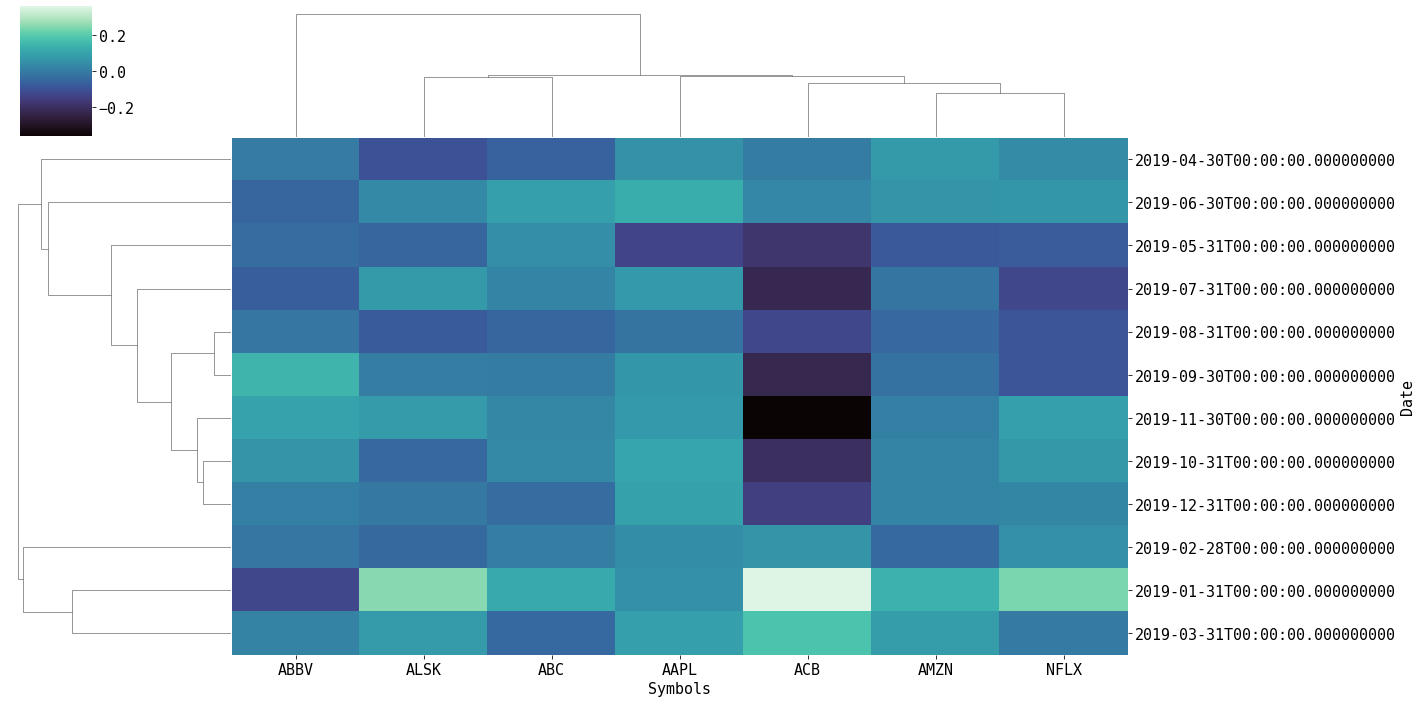

In [14]:
# Standardize the data |standard_scale|
# To normalize the data |z_score| 
# within the rows |0| columns |1|

sns.clustermap(log_returns, figsize=(20, 10), cmap = 'mako', 
               row_cluster = True, metric = 'correlation',
               method = 'single')
plt.show()

<div class="alert alert-block alert-info">
<b>Getting multiple stock's beta</b>
</div>

In [15]:
end = dt.datetime.now()
start = dt.date(end.year - 5, end.month - 1, end.day)
start_rf = dt.date(start.year, start.month + 1, start.day)

In [16]:
rm = data.DataReader(['^GSPC'], 'yahoo', start, end)['Adj Close']
rm = rm.resample('M').last().pct_change()
rm.head()

Symbols,^GSPC
Date,
2016-04-30,nan
2016-05-31,0.0153
2016-06-30,0.0009
2016-07-31,0.0356
2016-08-31,-0.0012


In [17]:
rf = data.DataReader('DGS1MO', 'fred', start_rf, end)
rf = rf.resample('M').last()
rf = rf/100
rf.head()

,DGS1MO
DATE,
2016-05-31,0.0027
2016-06-30,0.0020
2016-07-31,0.0019
2016-08-31,0.0026
2016-09-30,0.0020


In [18]:
df = pd.DataFrame({'rm': rm['^GSPC'], 
                   'rf': rf['DGS1MO']}).dropna()
df.head()

,rm,rf
Date,,
2016-05-31,0.0153,0.0027
2016-06-30,0.0009,0.0020
2016-07-31,0.0356,0.0019
2016-08-31,-0.0012,0.0026
2016-09-30,-0.0012,0.0020


In [19]:
def beta_model(assets, start, end):
    frame = pd.DataFrame()
    frame = data.DataReader(assets, 'yahoo', start, end)['Adj Close']
    frame = frame.resample('M').last().pct_change().dropna()
    for i in frame.columns:
        X1 = sm.add_constant(df['rm'])
        beta = sm.OLS(endog = frame[i], exog = X1, missing = 'drop').fit().params[1]
        print(i,'Beta (5 Years - Monthly):', beta)

In [20]:
# assets = ['AAPL', 'AMZN', 'ALSK', 'ABBV', 'ABC', 'ACB', 'NFLX']
beta_model(assets, start, end)

AAPL Beta (5 Years - Monthly): 1.2097411154131108
AMZN Beta (5 Years - Monthly): 1.1535818316413904
ALSK Beta (5 Years - Monthly): 1.4719024055257264
ABBV Beta (5 Years - Monthly): 0.8321820642460522
ABC Beta (5 Years - Monthly): 0.5388220021929526
ACB Beta (5 Years - Monthly): 3.066230457101343
NFLX Beta (5 Years - Monthly): 0.7561707063495284
